In [38]:
import matplotlib.pyplot as plt
import numpy as np
import math
from numpy.linalg import inv 
from numpy.linalg import norm
import scipy

# Question 1

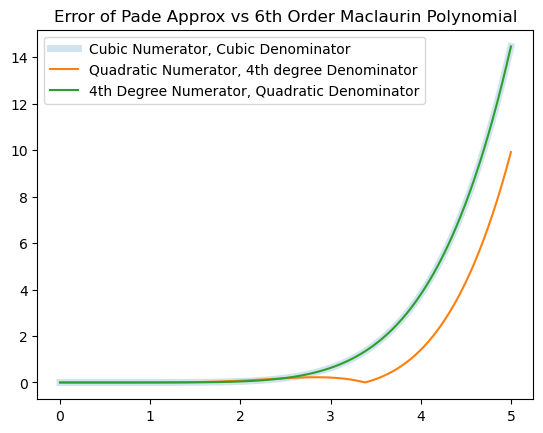

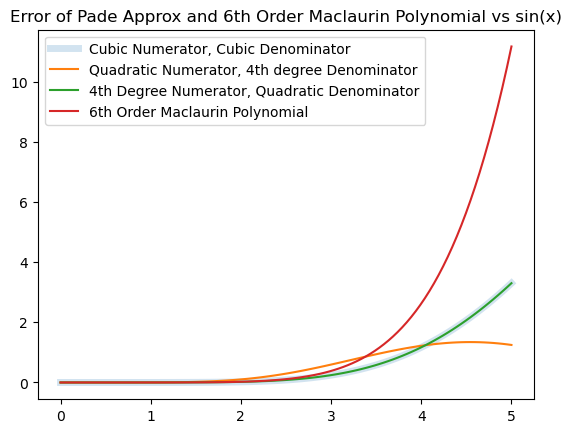

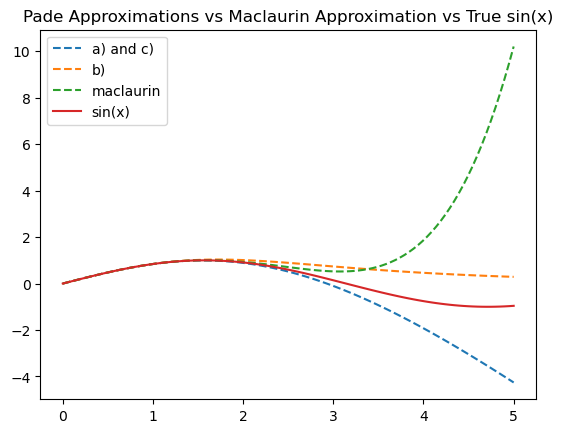

In [57]:
mac = lambda x: x - x**3/6 + x**5/120

Pa = lambda x: (x - (7/60)*x**3)/(1 + (1/20)*x**2)
Pb = lambda x: x/(1 + (1/6)*x**2 + (7/360)*x**4)
Pc = lambda x: (x - (7/60)*x**3)/(1 + (1/20)*x**2)

xvals = np.linspace(0,5,100)

errPa = abs(Pa(xvals) - mac(xvals))
errPb = abs(Pb(xvals) - mac(xvals))
errPc = abs(Pc(xvals) - mac(xvals))

errPat = abs(Pa(xvals) - np.sin(xvals))
errPbt = abs(Pb(xvals) - np.sin(xvals))
errPct = abs(Pc(xvals) - np.sin(xvals))
errMac = abs(mac(xvals) - np.sin(xvals))

plt.plot(xvals, errPa, label = 'Cubic Numerator, Cubic Denominator', linewidth = 5, alpha = .2)
plt.plot(xvals, errPb, label = 'Quadratic Numerator, 4th degree Denominator')
plt.plot(xvals, errPc, label = '4th Degree Numerator, Quadratic Denominator')
plt.title('Error of Pade Approx vs 6th Order Maclaurin Polynomial')
plt.legend()
plt.show()

plt.plot(xvals, errPat, label = 'Cubic Numerator, Cubic Denominator', linewidth = 5, alpha = .2)
plt.plot(xvals, errPbt, label = 'Quadratic Numerator, 4th degree Denominator')
plt.plot(xvals, errPct, label = '4th Degree Numerator, Quadratic Denominator')
plt.plot(xvals, errMac, label = '6th Order Maclaurin Polynomial')
plt.title('Error of Pade Approx and 6th Order Maclaurin Polynomial vs sin(x)')
plt.legend()
plt.show()

plt.plot(xvals, Pa(xvals),'--', label = 'a) and c)')
plt.plot(xvals, Pb(xvals), '--',label = 'b)')
plt.plot(xvals, mac(xvals), '--',label = 'maclaurin')
plt.plot(xvals, np.sin(xvals), label='sin(x)')
plt.legend()
plt.title("Pade Approximations vs Maclaurin Approximation vs True sin(x)")
plt.show()

# Question 3

In [61]:
def driver():
    
    f = lambda x: 1/(1+x**2)
    a = -5
    b = 5
    
    (truevaldef, abserrdef) = scipy.integrate.quad(f, a,b, epsabs = 1e-6,limit = 100)
    (trueval, abserr) = scipy.integrate.quad(f, a,b, epsabs = 1e-4,limit = 100)

    
    # exact integral
    I_ex = 2*np.arctan(5)
    
#    N =100
#    ntest = np.arrange(0,N,step=2)
    
#    errorT = np.zeros(len(ntest))
#    errorS = np.zeros(len(ntest))
    
#    for j in range(0,len(ntest)):
#        n = ntest[j]

# for simpson's n must be even.        
# n+1 = number of pts.
    nT = 1291
    nS = 108
    I_trap = CompTrap(a,b,nT,f)
    print('Integral with Trapezoidal = ', I_trap)
    
    err = abs(I_ex-I_trap)   
    
    print('absolute error trapezoidal = ', err)   
    print()
    
    I_simp = CompSimp(a,b,nS,f)

    print("Integral with Simpson's= ", I_simp)
    
    err = abs(I_ex-I_simp)   
    
    print("absolute error Simpson's = ", err)   
    print()

    print('Quad Value default =', truevaldef)
    print('Error of Quad default =', abserrdef)
    print('Quad Value set =', trueval)
    print('Error of Quad set =', abserr)
    
    
    
    
def CompTrap(a,b,n,f):
    h = (b-a)/n
    xnode = a+np.arange(0,n+1)*h
    
    I_trap = h*f(xnode[0])*1/2
    
    for j in range(1,n):
         I_trap = I_trap+h*f(xnode[j])
    I_trap= I_trap + 1/2*h*f(xnode[n])
    
    return I_trap     

def CompSimp(a,b,n,f):
    h = (b-a)/n
    xnode = a+np.arange(0,n+1)*h
    I_simp = f(xnode[0])

    nhalf = n/2
    for j in range(1,int(nhalf)+1):
         # even part 
         I_simp = I_simp+2*f(xnode[2*j])
         # odd part
         I_simp = I_simp +4*f(xnode[2*j-1])
    I_simp= I_simp + f(xnode[n])
    
    I_simp = h/3*I_simp
    
    return I_simp     


    
    
driver()    


Integral with Trapezoidal =  2.746801385962369
absolute error trapezoidal =  1.4792766300786298e-07

Integral with Simpson's=  2.74917569778904
absolute error Simpson's =  0.0023741638990082414

Quad Value default = 2.7468015338900327
Error of Quad default = 1.4334139675008473e-08
Quad Value set = 2.746801533909586
Error of Quad set = 1.0279997850748401e-05


In [67]:
scipy.integrate.quad(lambda x: 1/(1+x**2), -5,5, full_output = 1, epsabs = 1e-6,limit = 100)


(2.7468015338900327,
 1.4334139675008473e-08,
 {'neval': 147,
  'last': 4,
  'iord': array([         2,          1,          4,          3,  223387331,
         1021464483,  223387331, 1021464483,      65537,      65537,
              65537,      65537,      65537,      65537,      65537,
              65537,      65537,      65537,      65537,      65537,
              65537,      65537,      65537,      65537,      65537,
              65537,      65537,      65537,      65537,      65537,
              65537,      65537,      65537,      65537,      65537,
              65537,      65537,      65537,      65537,      65537,
              65537,      65537,      65537,      65537,      65537,
              65537,      65537,      65537,      65537,      65537,
              65537,      65537,      65537,      65537,      65537,
              65537,      65537,      65537,      65537,      65537,
              65537,      65537,      65537,      65537,      65537,
              65537,

For integral default settings, took 147 evals
For set integral lower tolerance, took 63 evals 

In [68]:
scipy.integrate.quad(lambda x: 1/(1+x**2), -5,5,full_output=1, epsabs = 1e-4,limit = 100)


(2.746801533909586,
 1.0279997850748401e-05,
 {'neval': 63,
  'last': 2,
  'iord': array([         1,          2, 2037009835, 1072892781, -573057675,
         1070034988, -573057675, 1070034988,   16843009,   16843009,
           16843009,   16843009,   16843009,   16843009,   16843009,
           16843009,   16843009,   16843009,   16843009,   16843009,
           16843009,   16843009,   16843009,   16843009,   16843009,
           16843009,   16843009,   16843009,   16843009,   16843009,
           16843009,   16843009,   16843009,   16843009,   16843009,
           16843009,   16843009,   16843009,   16843009,   16843009,
           16843009,   16843009,   16843009,   16843009,   16843009,
           16843009,   16843009,   16843009,   16843009,   16843009,
           16843009,   16843009,   16843009,   16843009,   16843009,
           16843009,   16843009,   16843009,   16843009,   16843009,
           16843009,   16843009,   16843009,   16843009,   16843009,
           16843009,  